### 1 MNIST (다중분류)

#### 1.1 데이터 로드

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### 1.2 데이터 확인

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
# 데이터 한 개만 출력
import matplotlib.pyplot as plt

digit = train_images[100]
label = train_labels[100]

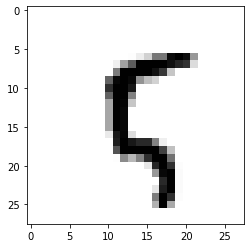

In [8]:
plt.imshow(digit, cmap = plt.cm.binary)
plt.show()

In [9]:
label # 정답

5

### 전처리

In [10]:
train_images = train_images.reshape(60000, 28 * 28)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(10000, 28 * 28)
test_images = test_images.astype('float32') / 255

In [11]:
from keras.utils import to_categorical

train_labels_one = to_categorical(train_labels)
test_labels_one = to_categorical(test_labels)

Using TensorFlow backend.


In [12]:
train_labels_one.shape, test_labels_one.shape

((60000, 10), (10000, 10))

### 1.4 신경망 설계(모델 설계)

In [13]:
model3 = Sequential()

model3.add(Dense(512, activation = 'relu', input_dim=784)) 
model3.add(Dense(10, activation = 'softmax'))  

In [14]:
model3.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

### 1.5 학습

In [15]:
model3.fit(train_images, train_labels_one, epochs = 10, batch_size = 84)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.2446 - accuracy: 0.9295
Epoch 2/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0964 - accuracy: 0.9719
Epoch 3/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0623 - accuracy: 0.9811
Epoch 4/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0430 - accuracy: 0.9877
Epoch 5/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0321 - accuracy: 0.9900
Epoch 6/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0227 - accuracy: 0.9935
Epoch 7/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0188 - accuracy: 0.9944
Epoch 8/10
60000/60000 [==============================] - 1s 16us/sample - loss: 0.0128 - accuracy: 0.9967
Epoch 9/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.0111 - accuracy: 0.9968
Epoch 10/10
60

### 1.6 평가

In [16]:
model3.evaluate(test_images, test_labels_one)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.0654 - accuracy: 0.9822


[0.06543431079589354, 0.9822]

### 1.7 예측하기

In [17]:
model3.predict([test_images[0:1]]) # 인덱스 0번째

array([[7.0377754e-10, 1.3658218e-10, 4.1484562e-08, 1.1640405e-05,
        3.1165597e-15, 9.8774198e-09, 9.3179672e-15, 9.9998808e-01,
        1.7157182e-09, 1.9914130e-07]], dtype=float32)

In [18]:
test_labels[0]

7

### 시각화

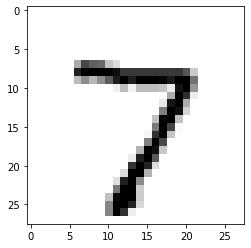

In [19]:
plt.imshow(test_images[0:1].reshape(28,28), cmap = plt.cm.binary) # 색깔을 2가지 색깔 흑백
plt.show()

## 2 CNN 모델링
* 사진의 원형을 유지하며 학습가능

In [20]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten

In [21]:
train_images.shape

(60000, 784)

In [22]:
train_images = train_images.reshape(60000, 28, 28, 1)

In [23]:
train_images.shape

(60000, 28, 28, 1)

In [24]:
#test data reshape
test_images = test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

### 2.2 CNN 모델링

In [25]:
# cnn_model = Sequential()
# # 1. feature extractor => 특징 추출부
# cnn_model.add(Conv2D(input_shape = (28, 28, 1), # 입력 데이터의 shape 정보
#                      filters = 3, #  수
#                     kernel_size = (3,3),#돋보기 크기
#                      activation="relu"
#                     ))

# cnn_model.add(MaxPool2D())

# cnn_model.add(Conv2D(filters = 3, #  수
#                     kernel_size = (3,3),#돋보기 크기
#                      activation="relu"
#                     ))

# cnn_model.add(MaxPool2D())
# # 2. classifier => MLP (추출된 특징으로 분류)
# cnn_model.add(MaxPool2D(Flatten()) # 데이터를 1차원으로 펴주는 층
# model.add(Dense(512,activation="relu"))
# model.add(Dense(10, activation="softmax"))

cnn_model = Sequential()
# 1. feature extraction 

cnn_model.add(Conv2D(input_shape = (28, 28, 1), # shape of input data
                    filters = 3, # number of magnifying glasses(MG)
                    # thus, the more you bring MG, the more diverse features will be extracted
                    kernel_size = (3, 3), # the size of MG  : 3 * 3 = 9
                    activation = "relu"
                    ))
cnn_model.add(MaxPool2D())


cnn_model.add(Conv2D(filters = 3, # number of magnifying glasses(MG)
                    # thus, the more you bring MG, the more diverse features will be extracted
                    kernel_size = (3, 3), # the size of MG  : 3 * 3 = 9
                    activation = "relu"
                    ))
cnn_model.add(MaxPool2D())
# 2. classifier - MLP(classify data according to extracted feature
cnn_model.add(Flatten()) # layer that makes data with 1 dimension (simplication)
cnn_model.add(Dense(512, activation = "relu"))
cnn_model.add(Dense(10, activation = "softmax"))


### 2.3 모델 학습

In [26]:
cnn_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [27]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 3)         30        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 3)         84        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 3)           0         
_________________________________________________________________
flatten (Flatten)            (None, 75)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               38912     
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [28]:
cnn_model.fit(train_images, train_labels_one, epochs=15, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 4s 107us/sample - loss: 0.3374 - accuracy: 0.8973 - val_loss: 0.1633 - val_accuracy: 0.9474
Epoch 2/15
42000/42000 [==============================] - 3s 74us/sample - loss: 0.1337 - accuracy: 0.9586 - val_loss: 0.1270 - val_accuracy: 0.9592
Epoch 3/15
42000/42000 [==============================] - 3s 72us/sample - loss: 0.0984 - accuracy: 0.9681 - val_loss: 0.1114 - val_accuracy: 0.9652
Epoch 4/15
42000/42000 [==============================] - 3s 73us/sample - loss: 0.0782 - accuracy: 0.9750 - val_loss: 0.0924 - val_accuracy: 0.9729
Epoch 5/15
42000/42000 [==============================] - 3s 76us/sample - loss: 0.0676 - accuracy: 0.9780 - val_loss: 0.0933 - val_accuracy: 0.9708
Epoch 6/15
42000/42000 [==============================] - 3s 74us/sample - loss: 0.0568 - accuracy: 0.9820 - val_loss: 0.0767 - val_accuracy: 0.9767
Epoch 7/15
42000/42000 [==============================]

### 2.4 모델 평가

In [29]:
cnn_model.evaluate(test_images, test_labels_one)

10000/10000 [==============================] - 0s 39us/sample - loss: 0.0685 - accuracy: 0.9806


[0.06851088715406077, 0.9806]

## 2.5 데이터의 문제점 
* 손글씨에 데이터에 배경이 없다
* 손글씨의 크기가 일정하고, 회전도 없다.
* MLP와 CNN모델의 성능이 비슷하다
* 데이터에 회전을 해서 비교해보자.

In [30]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [31]:
train_images = train_images.reshape(60000, 28, 28)
test_images = test_images.reshape(10000, 28, 28)

In [32]:
# !pip install Pillow

In [33]:
from PIL import Image
import numpy as np

In [34]:
angle = np.random.randint(0, 360)
angle

108

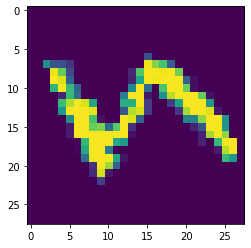

In [35]:
rotate_img = Image.fromarray(train_images[0]).rotate(angle)
plt.imshow(rotate_img)

In [36]:
train_images_rotate_list = [] 
for i in range(60000):
    angle = np.random.randint(0,360) # 회전시킬 각도 랜덤하게 뽑기
    rotate_img = Image.fromarray(train_images[0]).rotate(angle) # 각도 만큼 사진 회전
    train_images_rotate_list.append(np.array(rotate_img)) # numpy 타입으로 변경 후 추가

train_image_rotate = np.array(train_images_rotate_list) # 전체 list -> numpy 변경
train_image_rotate.shape

(60000, 28, 28)

In [37]:
test_images_rotate_list = [] 
for i in range(10000):
    angle = np.random.randint(0,360) # 회전시킬 각도 랜덤하게 뽑기
    rotate_img = Image.fromarray(test_images[0]).rotate(angle) # 각도 만큼 사진 회전
    test_images_rotate_list.append(np.array(rotate_img)) # numpy 타입으로 변경 후 추가

test_image_rotate = np.array(test_images_rotate_list) # 전체 list -> numpy 변경
test_image_rotate.shape

(10000, 28, 28)

###  2.6 회전된 데이터로 MLP와 CNN 비교(숙제)
MLP : 데이터 shape -> 784로 펴주기
CNN : 데이터 shape -> (sample, width, height, channel)

In [53]:
# MLP
mlp_model = Sequential()
mlp_model.add(Flatten()) 
mlp_model.add(Dense(512, activation="relu"))
mlp_model.add(Dense(1024, activation="relu"))
mlp_model.add(Dense(512, activation="relu"))
mlp_model.add(Dense(10, activation="softmax"))

mlp_model.compile(loss="categorical_crossentropy", 
                 optimizer="Adam",
                 metrics=["accuracy"])

In [54]:
mlp_model.fit(train_image_rotate, train_labels_one, epochs=15, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/15
42000/42000 [==============================] - 3s 75us/sample - loss: 3.1340 - accuracy: 0.1126 - val_loss: 2.3018 - val_accuracy: 0.1079
Epoch 2/15
42000/42000 [==============================] - 3s 67us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3020 - val_accuracy: 0.1079
Epoch 3/15
42000/42000 [==============================] - 3s 68us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 4/15
42000/42000 [==============================] - 3s 66us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3018 - val_accuracy: 0.1079
Epoch 5/15
42000/42000 [==============================] - 3s 66us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3018 - val_accuracy: 0.1079
Epoch 6/15
42000/42000 [==============================] - 3s 67us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 7/15
42000/42000 [==============================] 

### CNN

In [77]:
train_image_rotate = train_image_rotate.reshape(60000,28,28,1)
test_image_rotate = test_image_rotate.reshape(10000,28,28,1)

In [78]:
# CNN
cnn_model = Sequential()
cnn_model.add(Conv2D(input_shape=(28,28,1),
                     filters=16, # 특징을 도출해주는 돋보기 개수
                     kernel_size=(3,3), # 돋보기 크기
                     activation = 'relu'
                    ))
cnn_model.add(MaxPool2D()) # 불필요한 정보 삭제

cnn_model.add(Conv2D(filters=32, # 특징을 도출해주는 돋보기 개수
                     kernel_size=(3,3),# 돋보기 크기
                    activation = 'relu'))
cnn_model.add(MaxPool2D()) # 불필요한 정보 삭제

# 분류
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation="relu"))
cnn_model.add(Dense(10, activation="softmax"))

In [79]:
cnn_model.compile(loss="categorical_crossentropy", 
                 optimizer="Adam",
                 metrics=["accuracy"])

In [80]:
cnn_model.fit(train_image_rotate, train_labels_one, epochs=35, validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/35
42000/42000 [==============================] - 4s 93us/sample - loss: 2.7554 - accuracy: 0.1093 - val_loss: 2.3018 - val_accuracy: 0.1079
Epoch 2/35
42000/42000 [==============================] - 4s 84us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 3/35
42000/42000 [==============================] - 3s 82us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 4/35
42000/42000 [==============================] - 3s 81us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 5/35
42000/42000 [==============================] - 3s 83us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3018 - val_accuracy: 0.1079
Epoch 6/35
42000/42000 [==============================] - 3s 81us/sample - loss: 2.3011 - accuracy: 0.1143 - val_loss: 2.3019 - val_accuracy: 0.1079
Epoch 7/35
42000/42000 [==============================] 